Importing the Dependencies 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
data=pd.read_excel("/content/Data_Train.xlsx")

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.shape

(10683, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
category=['Airline','Source','Destination','Addtional_Info']
category

['Airline', 'Source', 'Destination', 'Addtional_Info']

In [5]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [13]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [12]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['year']=data.Date_of_Journey.str[2]


In [15]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [16]:
data.Route=data.Route.str.split(' ')
data.Route

0                        [BLR, →, DEL]
1        [CCU, →, IXR, →, BBI, →, BLR]
2        [DEL, →, LKO, →, BOM, →, COK]
3                [CCU, →, NAG, →, BLR]
4                [BLR, →, NAG, →, DEL]
                     ...              
10678                    [CCU, →, BLR]
10679                    [CCU, →, BLR]
10680                    [BLR, →, DEL]
10681                    [BLR, →, DEL]
10682    [DEL, →, GOI, →, BOM, →, COK]
Name: Route, Length: 10683, dtype: object

In [17]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [18]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [19]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [20]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [21]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [22]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [23]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [24]:
data.Duration=data.Duration.str.split(' ')

In [25]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [26]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [27]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [28]:
data.Additional_Info.replace('No Info','No Info',inplace=True)

In [29]:
data.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   1
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
year                    0
City1                   1
City2                   1
City3                   1
City4                3492
City5                3492
City6                9117
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Time_of_Arrival         0
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [30]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [31]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)


In [32]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
year                    0
City1                   1
City2                   1
City3                   1
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [33]:
data['City3'].fillna('None',inplace=True)

In [34]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [35]:
data['Travel_Mins'].fillna(0,inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   year               10683 non-null  object
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10683 non-null  object
 12  Dep_Time_Hour      10683 non-null  object
 13  Dep_Time_Mins      10683 non-null  object
 14  Arrival_date       10683 non-null  object
 15  Arrival_Time_Hour  10683 non-null  object
 16  Arrival_Time_Mins  10683 non-null  objec

In [37]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.year=data.year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')


In [38]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,→,GOI,16,50,6,16,55,5m,0


In [39]:
data.drop(index=6474,inplace=True,axis=0)

In [40]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [41]:
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date',
           'Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1  )
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,8,3897,24,3,2019,0,0,10,22,20,22,1,10,2,50
1,1,3,0,1,8,7662,1,5,2019,2,0,20,5,50,1,13,15,7,25
2,4,2,1,1,8,13882,9,6,2019,3,0,27,9,25,10,4,25,19,0
3,3,3,0,0,8,6218,12,5,2019,2,0,29,18,5,12,23,30,5,25
4,3,0,5,0,8,13302,1,3,2019,0,0,29,16,50,1,21,35,4,45


In [44]:
data=data[['Airline','Source','Destination','Date','Month','year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour'
,'Arrival_Time_Mins','Price']]

In [45]:
data.head()

,Airline,Source,Destination,Date,Month,year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


In [46]:
data.describe()

,Airline,Source,Destination,Date,Month,year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952069,1.435967,13.509081,4.708762,2019.0,12.490358,24.408819,13.908257,13.348530,24.687793,9086.292735
std,2.352090,1.177110,1.474773,8.479363,1.164294,0.0,5.748819,18.767225,8.466780,6.859398,16.504203,4610.885695
min,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,1.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,6.000000,3.000000,2019.0,8.000000,5.000000,7.000000,8.000000,10.000000,5277.000000
50%,4.000000,2.000000,1.000000,12.000000,5.000000,2019.0,11.000000,25.000000,13.000000,14.000000,25.000000,8372.000000
75%,4.000000,3.000000,2.000000,21.000000,6.000000,2019.0,18.000000,40.000000,21.000000,19.000000,35.000000,12373.000000
max,11.000000,4.000000,5.000000,27.000000,6.000000,2019.0,23.000000,55.000000,29.000000,23.000000,55.000000,79512.000000


<Figure size 1500x800 with 0 Axes>

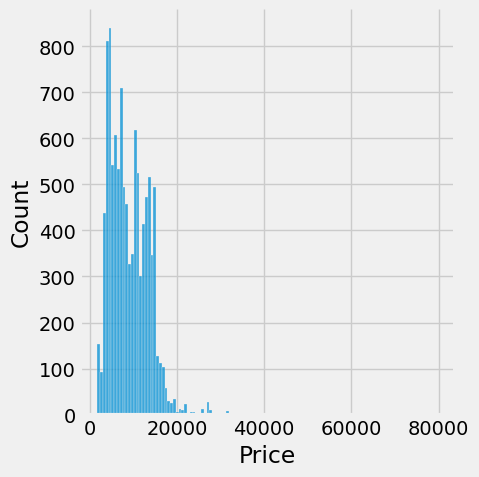

In [47]:
plt.figure(figsize=(15,8))
sns.displot(data.Price)

<Axes: >

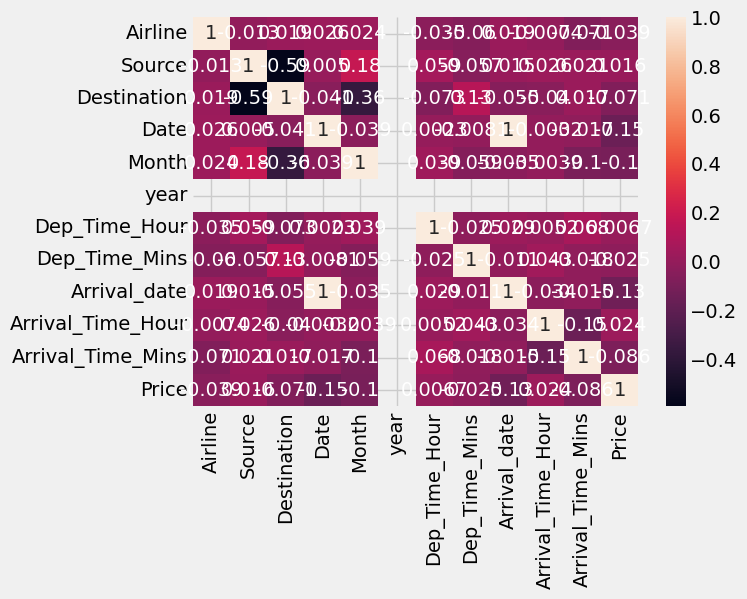

In [48]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

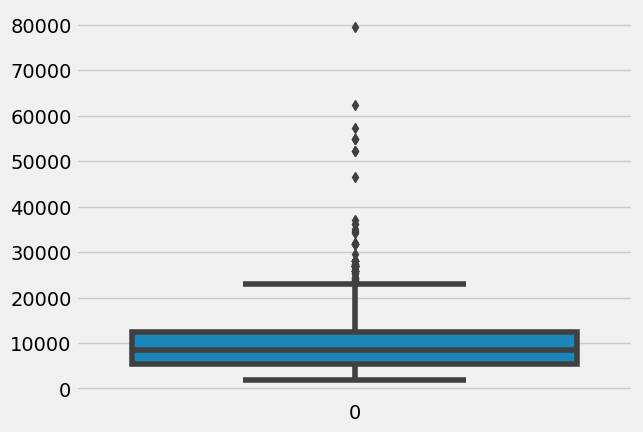

In [49]:
import seaborn as sns
sns.boxplot(data['Price'])

In [50]:
y = data['Price']
x = data.drop(columns=['Price'],axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [52]:
x_scaled=ss.fit_transform(x)

In [53]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Airline,Source,Destination,Date,Month,year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,1.654268,-0.234932,0.955750,-1.800319,-0.889984
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,-1.303000,1.363674,-1.524648,-0.050813,-0.587017
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,-0.607172,0.031502,-0.461621,-1.362943,0.018918
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.225392,1.407109,0.321885
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.610527,1.363674,-1.524648,1.115525,0.624852


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
x_train.head()

,Airline,Source,Destination,Date,Month,year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10005,6,2,1,27,5,2019,8,30,27,19,15
3684,4,2,1,9,5,2019,11,30,10,12,35
1034,8,2,1,24,4,2019,15,45,24,22,5
3909,6,2,1,21,3,2019,12,50,22,1,35
3088,1,2,1,24,6,2019,17,15,25,19,15


In [56]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [57]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for i in [rfr,gb,ad]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.2:
    print(i)
    print("R2 score is",r2_score(y_test,y_pred))
    print("R2 for train data",r2_score(y_train,i.predict(x_train)))
    print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
    print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
    print("Root Mean Sqaured Error is",(mean_squared_error(y_pred,y_test,squared=False)))


RandomForestRegressor()
R2 score is 0.8517363097052952
R2 for train data 0.9505506998257709
Mean Absolute Error is 1173.0655928036633
Mean Squared Error is 3134149.401209075
Root Mean Sqaured Error is 1770.3529030137113
GradientBoostingRegressor()
R2 score is 0.7652984210151785
R2 for train data 0.7338510043179753
Mean Absolute Error is 1682.5724410521439
Mean Squared Error is 4961361.826189309
Root Mean Sqaured Error is 2227.41146315388
AdaBoostRegressor()
R2 score is 0.301431980652349
R2 for train data 0.3202777220100811
Mean Absolute Error is 3135.7079121171155
Mean Squared Error is 14767044.683633136
Root Mean Sqaured Error is 3842.7912620428833


In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()
for i in [knn,svr,dt]:
   i.fit(x_train,y_train)
   y_pred=i.predict(x_test)
   test_score=r2_score(y_test,y_pred)
   train_score=r2_score(y_train,i.predict(x_train))
   if abs(train_score-test_score)<=0.1:
    print(i)
    print("R2 score is",r2_score(y_test,y_pred))
    print("R2 score for train data",r2_score(y_train,i.predict(x_train)))
    print("Mean Absolute Error is",mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error is",mean_squared_error(y_test,y_pred))
    print("Root Mean Sqaured Error is",(mean_squared_error(y_test,y_pred,squared=False)))

SVR()
R2 score is -0.030117446601644504
R2 score for train data -0.023060876999700497
Mean Absolute Error is 3629.610207677262
Mean Squared Error is 21775675.29868014
Root Mean Sqaured Error is 4666.441395611879


In [59]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score(rfr,x,y,cv=i)
  print(rfr,cv.mean())

RandomForestRegressor() 0.7912695906377416
RandomForestRegressor() 0.7929348474787171
RandomForestRegressor() 0.8002950654076821


In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [62]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [63]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accurancy",r2_score(y_train_pred,y_train))
print("test accurancy",r2_score(y_test_pred,y_test))

train accurancy 0.9192989922608077
test accurancy 0.7601223986552397


In [64]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accurancy",r2_score(y_train_pred,y_train))
print("test accurancy",r2_score(y_test_pred,y_test))

train accurancy 0.8282052673851559
test accurancy 0.4817675302068355


In [65]:
predicted_values=pd.DataFrame({'Actual':y_test,'predicted':y_pred})

In [67]:
predicted_values

,Actual,predicted
6075,16655,16840.0
3544,4959,4959.0
9291,9187,8085.0
5032,3858,3597.0
2483,12898,16079.0
...,...,...
9797,7408,13587.0
9871,4622,6251.0
10063,7452,7452.0
8803,7060,6885.0


In [68]:
prices=rfr.predict(x_test)

In [69]:
price_list=pd.DataFrame({'Price':prices})

In [70]:
price_list

,Price
0,15288.700
1,6011.300
2,9040.100
3,3623.100
4,14407.185
...,...
2132,12351.200
2133,6966.100
2134,6687.000
2135,9054.900


In [71]:
import pickle
pickle.dump(rfr,open('model.pkl','wb'))
